In [1]:
# prompt: import google drive and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Specify the directory containing your CSV files
data_folder = '/content/drive/My Drive/Colab Notebooks/Independent Study/Data/TrafficLabelling'

# List of encodings to try
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'windows-1252']

# Get all CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Initialize an empty list to store dataframes
dataframes = []

# Process each CSV file
for file in csv_files:
    file_path = os.path.join(data_folder, file)
    print(f"Processing file: {file}")

    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Successfully read {file} with {encoding} encoding")
            # Strip spaces from column headers
            df.columns = df.columns.str.strip()
            dataframes.append(df)
            break
        except UnicodeDecodeError:
            print(f"Failed to read {file} with {encoding} encoding")
    else:
        print(f"Failed to read {file} with any encoding")

# Combine all successfully read dataframes
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Combined dataframe shape: {combined_df.shape}")

    # Remove any rows with NA or null values in the entire dataset
    combined_df = combined_df.dropna()

    # Reset the index after dropping rows
    combined_df.reset_index(drop=True, inplace=True)

    print(f"Dataframe shape after removing NA/null values: {combined_df.shape}")

    # Step 2: Convert labels that aren't 'BENIGN' to 'ATTACK'
    combined_df['Label'] = combined_df['Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else x)

    # Mask target labels: 0 for BENIGN, 1 for ATTACK
    combined_df['Label'] = combined_df['Label'].map({'BENIGN': 0, 'ATTACK': 1})
else:
    print("No files were successfully read")


df = combined_df

#Handle infinite values in specific features
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace([np.inf, -np.inf], -1)
df['Flow Packets/s'] = df['Flow Packets/s'].replace([np.inf, -np.inf], -1)

#Remove irrevant feaures
df = df.drop(columns=['Flow ID', 'Timestamp', 'Source IP', 'Destination IP', 'Source Port', 'Destination Port'])

#this column is identical to Fwd Header Length, so remove it
df = df.drop(columns=['Fwd Header Length.1'])

# Identify float64 columns
float64_columns = df.select_dtypes(include=['float64']).columns

# Normalize float64 features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[float64_columns] = scaler.fit_transform(df[float64_columns])

print("Float64 columns normalized:")
print(float64_columns.tolist())

# Display the first few rows of the normalized dataframe
print("\nFirst few rows of the normalized dataframe:")
print(df.head())

# Display summary statistics of the normalized features
print("\nSummary statistics of normalized features:")
print(df[float64_columns].describe())



Processing file: Monday-WorkingHours.pcap_ISCX.csv
Successfully read Monday-WorkingHours.pcap_ISCX.csv with utf-8 encoding
Processing file: Tuesday-WorkingHours.pcap_ISCX.csv
Successfully read Tuesday-WorkingHours.pcap_ISCX.csv with utf-8 encoding
Processing file: Wednesday-workingHours.pcap_ISCX.csv
Successfully read Wednesday-workingHours.pcap_ISCX.csv with utf-8 encoding
Processing file: Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Successfully read Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv with utf-8 encoding
Processing file: Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Failed to read Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with utf-8 encoding


<ipython-input-2-5508442366b8>:27: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Successfully read Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with latin-1 encoding
Processing file: Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Successfully read Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv with utf-8 encoding
Processing file: Friday-WorkingHours-Morning.pcap_ISCX.csv
Successfully read Friday-WorkingHours-Morning.pcap_ISCX.csv with utf-8 encoding
Processing file: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Successfully read Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv with utf-8 encoding
Combined dataframe shape: (3119345, 85)
Dataframe shape after removing NA/null values: (2829385, 85)
Float64 columns normalized:
['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Pa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829385 entries, 0 to 2829384
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Protocol                     float64
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  

In [3]:
df.shape

(2829385, 78)

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns

print(df.head())

   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0  0.352941   1.416667e-07           0.000005                     0.0   
1  0.352941   1.166667e-07           0.000005                     0.0   
2  0.352941   1.166667e-07           0.000005                     0.0   
3  0.352941   1.166667e-07           0.000005                     0.0   
4  0.352941   1.333333e-07           0.000005                     0.0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                 9.302326e-07                          0.0   
1                 9.302326e-07                          0.0   
2                 9.302326e-07                          0.0   
3                 9.302326e-07                          0.0   
4                 9.302326e-07                          0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0               0.000242               0.002581                 0.00101   
1               0.000242        

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns

print(df_selected.head())

   Flow Duration  Total Fwd Packets  Total Backward Packets  \
0          166.0                1.0                     1.0   
1           83.0                1.0                     2.0   
2        99947.0                1.0                     1.0   
3        37017.0                1.0                     1.0   
4    111161336.0              147.0                     0.0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                         48.0                         48.0   
3                         48.0                         48.0   
4                          0.0                          0.0   

   Fwd Packet Length Max  Fwd Packet Length Mean  Bwd Packet Length Max  \
0                    0.0                     0.0                    0.0   
1                    0.0                     0.0                    0.0   
2                

In [ ]:
df_selected.shape

(2829385, 35)

In [ ]:
df_selected['Label'].value_counts()

# Calculate and print the label value count ratio
label_counts = df_selected['Label'].value_counts()
label_ratio = label_counts / len(df_selected)
print("Label value count ratio:")
print(label_ratio)

Label value count ratio:
Label
0    0.803245
1    0.196755
Name: count, dtype: float64


In [6]:
# Perform 70-30 train-test split
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Verify the split ratio
print("\nSplit ratio:")
print(f"Training set: {len(X_train) / len(X):.2%}")
print(f"Testing set: {len(X_test) / len(X):.2%}")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))


Training set shape: (1980569, 77)
Testing set shape: (848816, 77)
Training labels shape: (1980569,)
Testing labels shape: (848816,)

Split ratio:
Training set: 70.00%
Testing set: 30.00%

Class distribution in training set:
Label
0    0.803244
1    0.196756
Name: proportion, dtype: float64

Class distribution in testing set:
Label
0    0.803245
1    0.196755
Name: proportion, dtype: float64


In [7]:
from sklearn.decomposition import PCA

def apply_pca(X_train, X_test, variance_threshold=0.95):
    # Fit PCA on training data
    pca = PCA(n_components=variance_threshold, svd_solver='full')
    pca.fit(X_train)

    # Transform both train and test data
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    n_components = pca.n_components_
    print(f"Number of components selected: {n_components}")
    print(f"Cumulative explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

    return X_train_pca, X_test_pca, n_components

# Apply PCA to embeddings
X_train_pca, X_test_pca, n_components = apply_pca(X_train, X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)
print(f"Number of components selected: {n_components}")

Number of components selected: 10
Cumulative explained variance ratio: 0.9602
(1980569, 10)
(848816, 10)
Number of components selected: 10


In [8]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns #for plots
#our models and ML tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm  # Import tqdm for notebook usage

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()

models = [rfc, abc, gbc, etc, lr, knn]
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'Extra Trees', 'Logistic Regression', 'KNN']

def predicting_anomaly(X_train, X_test, y_train, y_test, models, names): #define prediction function
  display(HTML('<h1>Predicting Anomaly</h1>')) #display HTML

  def training(model, name, axes): #define training function
    model.fit(X_train, y_train) #fit the model
    pred = model.predict(X_test) #predict the values
    score = accuracy_score(y_test, pred) #obtain score
    report = classification_report(y_test, pred) #obtain report
    cm = confusion_matrix(y_test, pred) #obtain CM
    sns.heatmap(cm, annot=True, ax=axes) #optain heatmap
    axes.set_title("{}: {}%".format(name, round(score*100, 2))) #display formatting
    return score*100, report #returned results

  display(HTML('<h1>Training and evaluation of Network Traffic Binary Prediction</h1>')) #display HTML

  #create plots
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,7)) #create plots
  index = 0
  scores, reports = [], dict()
  for i in tqdm(range(2), desc="Row Progress"):
        for j in tqdm(range(3), desc="Column Progress", leave=False):
            print("Current Model: ", names[index])
            score, report = training(models[index], names[index], axes[i][j])
            reports[names[index]] = report
            index += 1
            scores += [score]
  plt.tight_layout()
  plt.show()

  dt = pd.DataFrame({"scores": scores}, index=names)
  dt = dt.sort_values("scores", ascending=False)
  dt["scores"] = round(dt["scores"], 2)
  fig, axes = plt.subplots()
  sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
  for container in axes.containers:
      axes.bar_label(container)
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
  axes.set_xlabel("Model Names")
  axes.set_title("Model Accuracy")
  plt.show()

  for i in dt.index:
        print("*"*30)
        print(i)
        print(reports[i])
        print("\n\n")

Row Progress:   0%|          | 0/2 [00:00<?, ?it/s]

Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Random Forest
Current Model:  AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Current Model:  Gradient Boost


Column Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Current Model:  Extra Trees
Current Model:  Logistic Regression
Current Model:  KNN


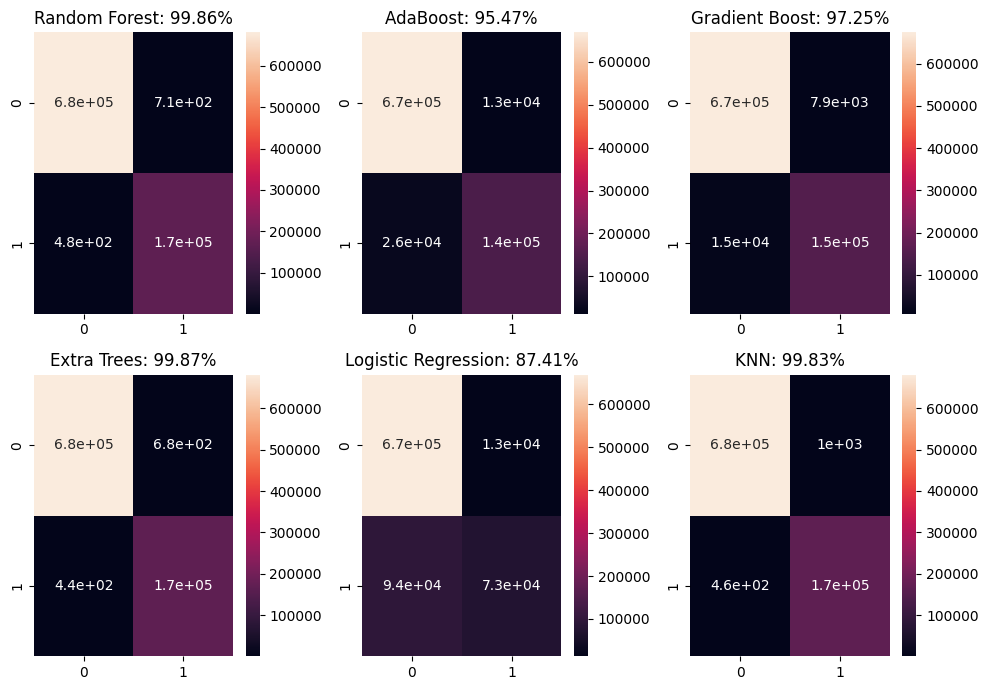

<ipython-input-8-c490f2783530>:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


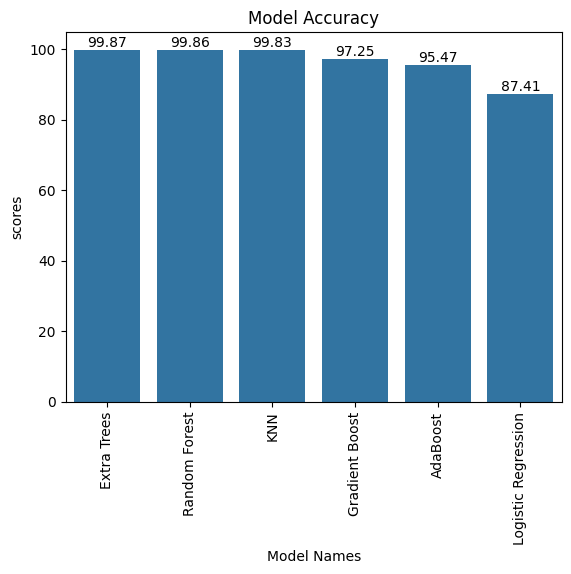

******************************
Extra Trees
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681807
           1       1.00      1.00      1.00    167009

    accuracy                           1.00    848816
   macro avg       1.00      1.00      1.00    848816
weighted avg       1.00      1.00      1.00    848816




******************************
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681807
           1       1.00      1.00      1.00    167009

    accuracy                           1.00    848816
   macro avg       1.00      1.00      1.00    848816
weighted avg       1.00      1.00      1.00    848816




******************************
KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681807
           1       0.99      1.00      1.00    167009

    accuracy                           1.00    848816

In [9]:
predicting_anomaly(X_train_pca, X_test_pca, y_train, y_test, models, model_names)